In [1]:
import os
import pandas as pd
#from pandas import datetime
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import sklearn

In [3]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: LICENSE
  File: le_projet_coule.png
  File: test.csv
  File: requirements.tt
  File: read_files_nahel.ipynb
  File: README.md
  File: .gitignore
  File: utils.py
  File: settings.py
  File: le_projet_coulev2.png
  File: normalization.py
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./B_reshaped
  File: X_train_observed.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./C_reshaped
  File: X_train_observed.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./corr_matrix
  File: corr_matrix1.ipynb
  File: corr_matrix4c.ipynb
  File: corr_matrix3.ipynb
  File: correlation_matrix.ipynb
  File: corr_matrix2.ipynb
  File: corr_matrix4b.ipynb
  File: corr_matrix4.ipynb
  File: corr_graph.ipynb
  File: corr_matrix_reshaped_1_by_4_x_y_b.png
  File: corr_matrix_reshaped_1_by_4_x_y_c.png
  File: corr_matrix_reshaped_1_by_4_x_y_a.pdf
Directory: ./corr_matr

In [4]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')
#print(train_a.shape[0],train_b.shape[0],train_c.shape[0])
print(train_b)
#train_a.describe()
#train_b.describe()
#train_c.describe()

                     time  pv_measurement
0     2018-12-31 23:00:00        0.000000
1     2019-01-01 00:00:00        0.000000
2     2019-01-01 01:00:00        0.000000
3     2019-01-01 02:00:00        0.000000
4     2019-01-01 03:00:00        0.000000
...                   ...             ...
32843 2023-04-30 19:00:00        0.828587
32844 2023-04-30 20:00:00       -0.000000
32845 2023-04-30 21:00:00       -0.000000
32846 2023-04-30 22:00:00       -0.000000
32847 2023-04-30 23:00:00       -0.000000

[32848 rows x 2 columns]


In [5]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
#print(X_train_estimated_a.shape[0],X_train_estimated_b.shape[0],X_train_estimated_c.shape[0])
#print(X_train_estimated_a)
#X_train_estimated_a.describe()


In [6]:
X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


In [7]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
#print(X_train_observed_a.shape[0],X_train_observed_b.shape[0],X_train_observed_c.shape[0])
print(X_train_observed_a)
#X_train_observed_a.describe()


             date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0      2019-06-02 22:00:00                       7.7                1.230   
1      2019-06-02 22:15:00                       7.7                1.229   
2      2019-06-02 22:30:00                       7.7                1.228   
3      2019-06-02 22:45:00                       7.7                1.226   
4      2019-06-02 23:00:00                       7.7                1.225   
...                    ...                       ...                  ...   
118664 2022-10-21 00:00:00                       5.0                1.292   
118665 2022-10-21 00:15:00                       5.0                1.292   
118666 2022-10-21 00:30:00                       5.0                1.292   
118667 2022-10-21 00:45:00                       5.0                1.292   
118668 2022-10-21 01:00:00                       5.0                1.292   

        ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0  

In [8]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
#print(X_train_estimated_a.shape[0],X_train_estimated_b.shape[0],X_train_estimated_c.shape[0])
#print(X_test_estimated_a)
#X_train_estimated_c.describe()


In [12]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

In [13]:
#################
#XGBOOST MODEL
#################

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [15]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


In [16]:
train_a['time'] = pd.to_datetime(train_a['time'])
train_a.dropna(subset=['pv_measurement'], inplace=True)

train_b['time'] = pd.to_datetime(train_b['time'])
train_b.dropna(subset=['pv_measurement'], inplace=True)

train_c['time'] = pd.to_datetime(train_c['time'])
train_c.dropna(subset=['pv_measurement'], inplace=True)

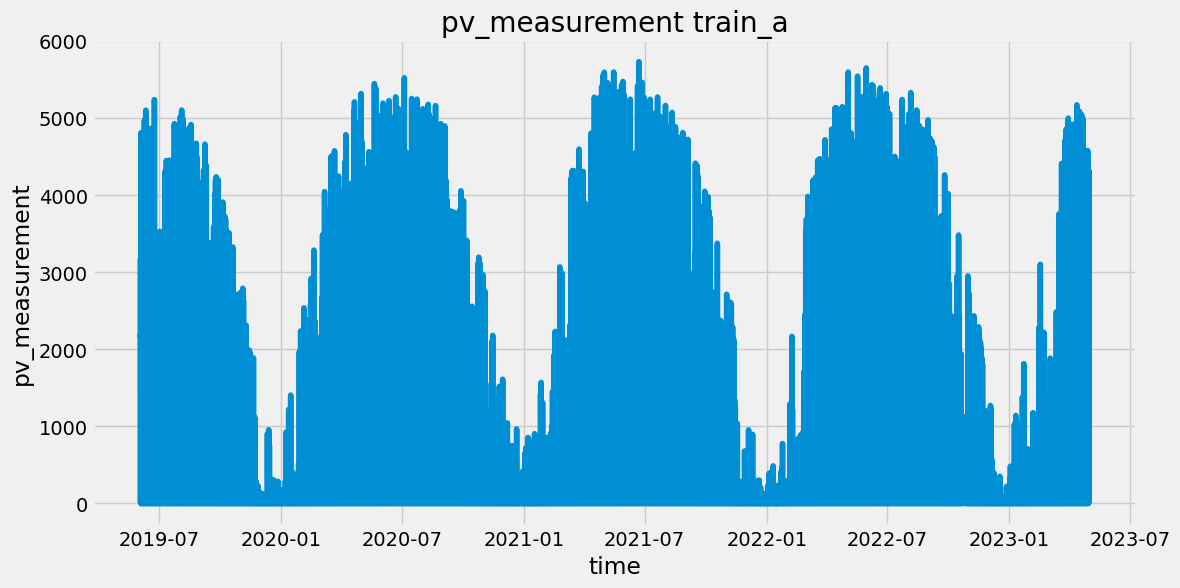

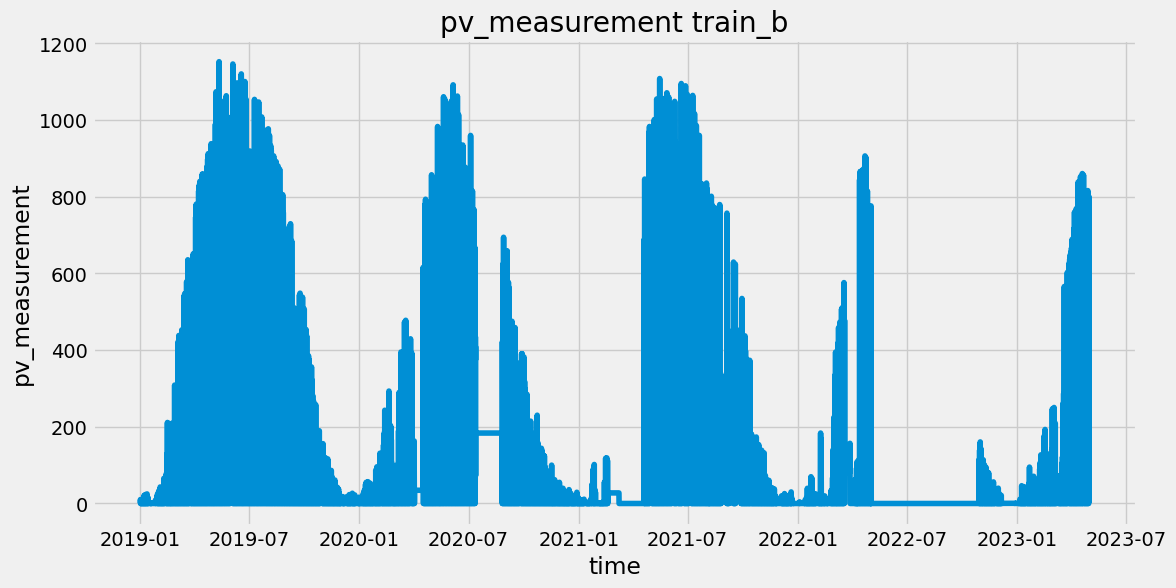

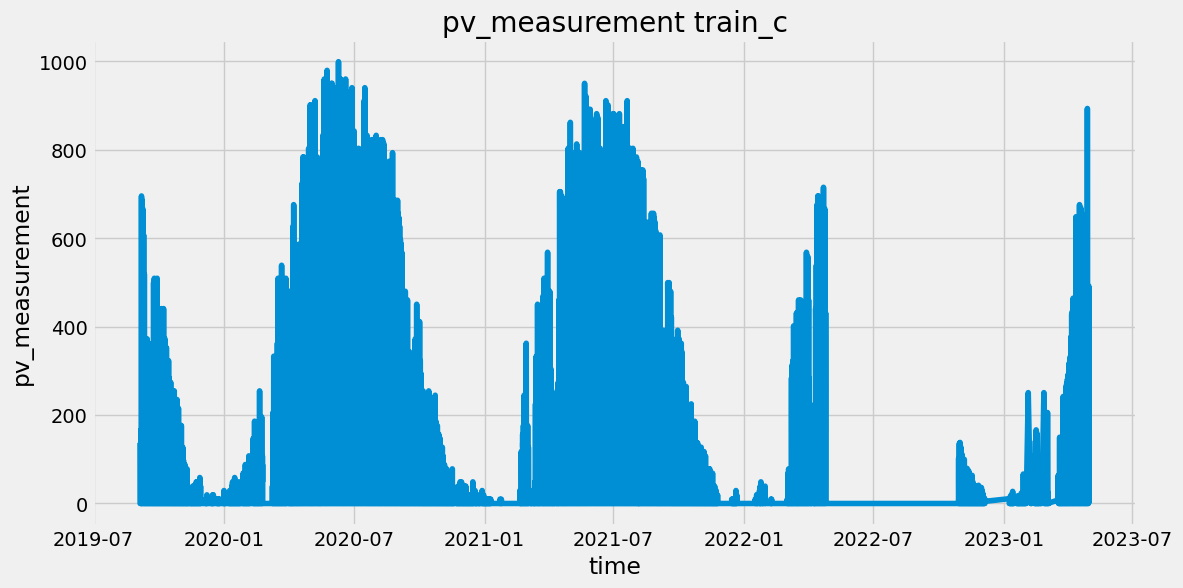

In [17]:
plt.figure(figsize=(12, 6)) 
plt.plot(train_a['time'], train_a['pv_measurement'])
plt.title('pv_measurement train_a')
plt.xlabel('time')
plt.ylabel('pv_measurement')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6)) 
plt.plot(train_b['time'], train_b['pv_measurement'])
plt.title('pv_measurement train_b')
plt.xlabel('time')
plt.ylabel('pv_measurement')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6)) 
plt.plot(train_c['time'], train_c['pv_measurement'])
plt.title('pv_measurement train_c')
plt.xlabel('time')
plt.ylabel('pv_measurement')
plt.grid(True)
plt.show()

In [18]:
train_a.set_index('time', inplace=True)
split_date_a = pd.to_datetime("2022-01-01")  # Date de séparation souhaitée
pv_train_a = train_a.loc[train_a.index <= split_date_a].copy()
pv_test_a = train_a.loc[train_a.index > split_date_a].copy()

train_b.set_index('time', inplace=True)
split_date_b = pd.to_datetime("2022-01-01")  # Date de séparation souhaitée
pv_train_b = train_b.loc[train_b.index <= split_date_b].copy()
pv_test_b = train_b.loc[train_b.index > split_date_b].copy()

train_c.set_index('time', inplace=True)
split_date_c = pd.to_datetime("2022-01-01")  # Date de séparation souhaitée
pv_train_c = train_c.loc[train_c.index <= split_date_c].copy()
pv_test_c = train_c.loc[train_c.index > split_date_c].copy()

In [19]:
pv_train_a

,pv_measurement
time,
2019-06-02 22:00:00,0.00
2019-06-02 23:00:00,0.00
2019-06-03 00:00:00,0.00
2019-06-03 01:00:00,0.00
2019-06-03 02:00:00,19.36
...,...
2021-12-31 20:00:00,0.00
2021-12-31 21:00:00,0.00
2021-12-31 22:00:00,0.00


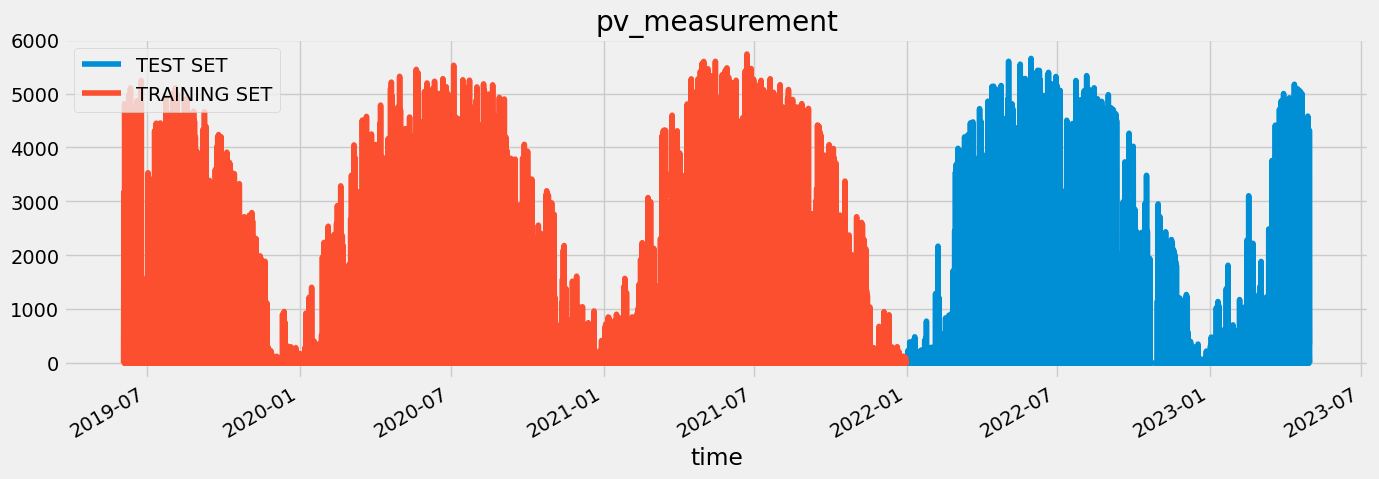

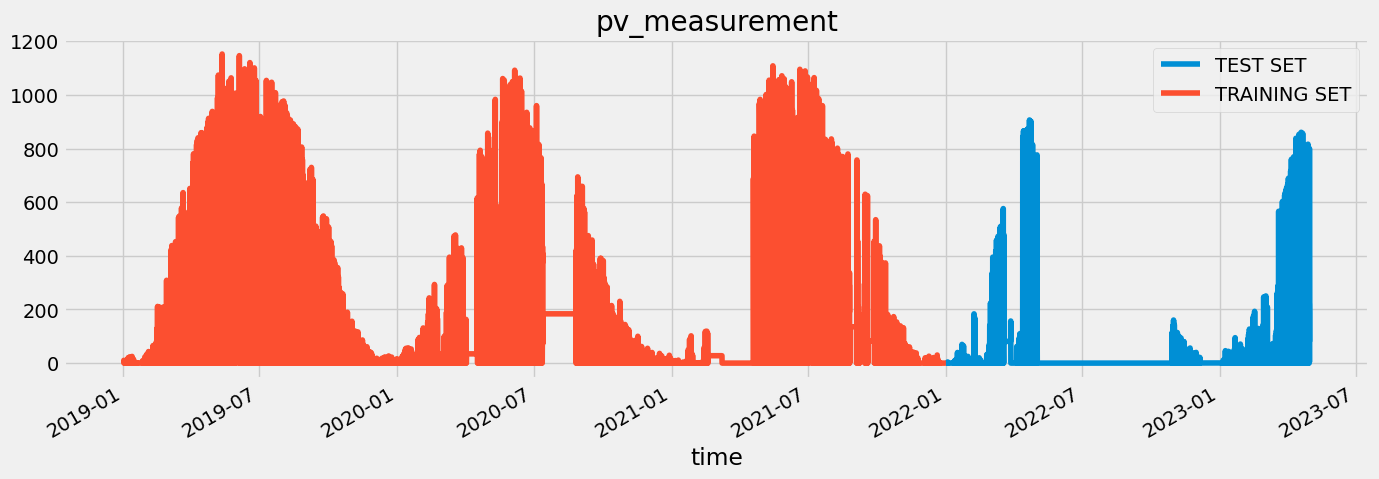

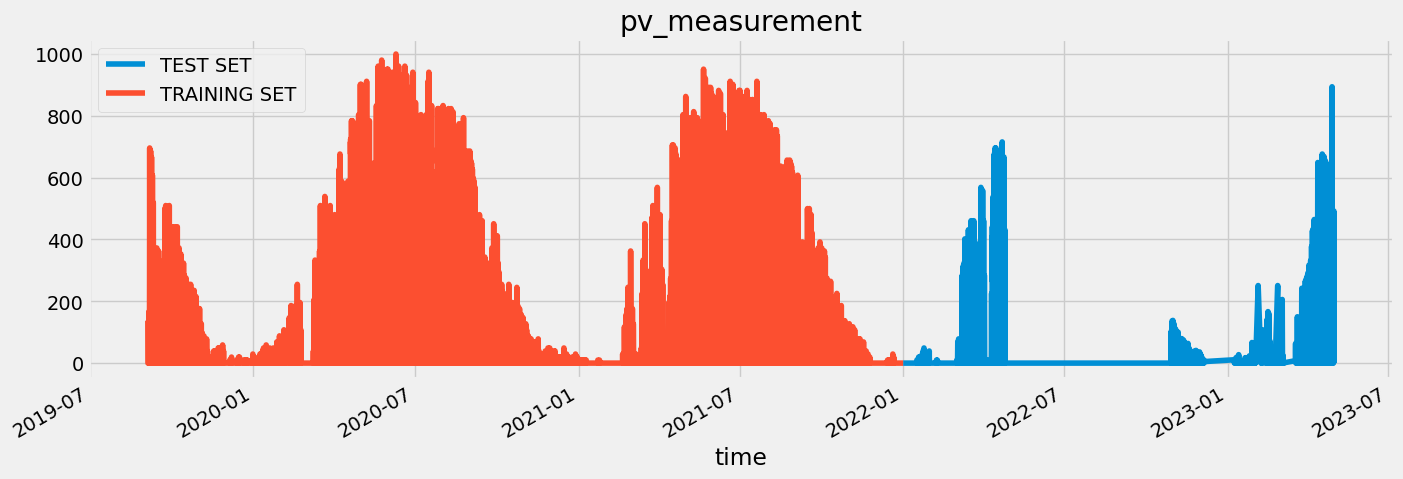

In [20]:
_ = pv_test_a \
    .rename(columns={'pv_measurement': 'TEST SET'}) \
    .join(pv_train_a.rename(columns={'pv_measurement': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='pv_measurement', style='')

_ = pv_test_b \
    .rename(columns={'pv_measurement': 'TEST SET'}) \
    .join(pv_train_b.rename(columns={'pv_measurement': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='pv_measurement', style='')

_ = pv_test_c \
    .rename(columns={'pv_measurement': 'TEST SET'}) \
    .join(pv_train_c.rename(columns={'pv_measurement': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='pv_measurement', style='')

In [23]:
reg_a = xgb.XGBRegressor(n_estimators=1000)
reg_a.fit(X_train_a, y_train_a,
        eval_set=[(X_train_a, y_train_a), (X_test_a, y_test_a)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:961.68701	validation_1-rmse:943.54634
[1]	validation_0-rmse:828.04127	validation_1-rmse:814.82450
[2]	validation_0-rmse:748.33874	validation_1-rmse:750.96805


[3]	validation_0-rmse:700.12981	validation_1-rmse:718.14326
[4]	validation_0-rmse:671.90348	validation_1-rmse:703.27108
[5]	validation_0-rmse:656.03926	validation_1-rmse:693.80020
[6]	validation_0-rmse:642.69983	validation_1-rmse:695.05823
[7]	validation_0-rmse:634.18055	validation_1-rmse:693.07012
[8]	validation_0-rmse:622.70682	validation_1-rmse:695.50351
[9]	validation_0-rmse:613.58729	validation_1-rmse:700.96784
[10]	validation_0-rmse:610.07589	validation_1-rmse:701.37939
[11]	validation_0-rmse:599.57208	validation_1-rmse:702.97120
[12]	validation_0-rmse:589.54687	validation_1-rmse:710.84137
[13]	validation_0-rmse:578.04072	validation_1-rmse:713.68414
[14]	validation_0-rmse:571.72806	validation_1-rmse:716.77932
[15]	validation_0-rmse:564.72834	validation_1-rmse:717.31708
[16]	validation_0-rmse:560.35661	validation_1-rmse:717.58447
[17]	validation_0-rmse:555.52660	validation_1-rmse:719.42655
[18]	validation_0-rmse:552.09966	validation_1-rmse:720.56154
[19]	validation_0-rmse:542.5215

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:478.40915	validation_1-rmse:749.55906
[39]	validation_0-rmse:475.95538	validation_1-rmse:750.45409
[40]	validation_0-rmse:472.65459	validation_1-rmse:752.38137
[41]	validation_0-rmse:470.57825	validation_1-rmse:753.64801
[42]	validation_0-rmse:467.22087	validation_1-rmse:756.16559
[43]	validation_0-rmse:464.77333	validation_1-rmse:757.45973
[44]	validation_0-rmse:461.93767	validation_1-rmse:757.71919
[45]	validation_0-rmse:461.04798	validation_1-rmse:758.12338
[46]	validation_0-rmse:457.50948	validation_1-rmse:758.99253
[47]	validation_0-rmse:454.55236	validation_1-rmse:760.30771
[48]	validation_0-rmse:453.06040	validation_1-rmse:761.08913
[49]	validation_0-rmse:451.32590	validation_1-rmse:761.50534
[50]	validation_0-rmse:449.62128	validation_1-rmse:762.45199
[51]	validation_0-rmse:447.21720	validation_1-rmse:763.49173
[52]	validation_0-rmse:444.30903	validation_1-rmse:766.25103
[53]	validation_0-rmse:441.39059	validation_1-rmse:767.60679
[54]	validation_0-rmse:4

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
reg_b = xgb.XGBRegressor(n_estimators=1000)
reg_b.fit(X_train_b, y_train_b,
        eval_set=[(X_train_b, y_train_b), (X_test_b, y_test_b)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:166.06085	validation_1-rmse:130.80300
[1]	validation_0-rmse:140.98885	validation_1-rmse:121.73424
[2]	validation_0-rmse:126.25849	validation_1-rmse:115.34039
[3]	validation_0-rmse:115.88417	validation_1-rmse:115.43307
[4]	validation_0-rmse:110.37383	validation_1-rmse:114.53021


[5]	validation_0-rmse:106.01363	validation_1-rmse:115.78170
[6]	validation_0-rmse:103.06052	validation_1-rmse:114.68797
[7]	validation_0-rmse:100.98914	validation_1-rmse:116.28245
[8]	validation_0-rmse:99.43667	validation_1-rmse:115.30359
[9]	validation_0-rmse:98.09495	validation_1-rmse:115.46440
[10]	validation_0-rmse:95.99442	validation_1-rmse:116.19794
[11]	validation_0-rmse:94.17128	validation_1-rmse:117.22136
[12]	validation_0-rmse:92.95678	validation_1-rmse:117.17158
[13]	validation_0-rmse:91.65539	validation_1-rmse:118.28435
[14]	validation_0-rmse:90.77890	validation_1-rmse:117.51411
[15]	validation_0-rmse:89.69671	validation_1-rmse:118.77440
[16]	validation_0-rmse:88.80279	validation_1-rmse:119.84561
[17]	validation_0-rmse:87.99644	validation_1-rmse:119.92194
[18]	validation_0-rmse:87.00404	validation_1-rmse:119.96497
[19]	validation_0-rmse:86.18343	validation_1-rmse:119.77915
[20]	validation_0-rmse:85.65460	validation_1-rmse:119.70291
[21]	validation_0-rmse:84.78981	validation

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
reg_c = xgb.XGBRegressor(n_estimators=1000)
reg_c.fit(X_train_c, y_train_c,
        eval_set=[(X_train_c, y_train_c), (X_test_c, y_test_c)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:139.90151	validation_1-rmse:98.02877
[1]	validation_0-rmse:117.89808	validation_1-rmse:83.71568
[2]	validation_0-rmse:102.99324	validation_1-rmse:75.38721


/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:93.92670	validation_1-rmse:71.36345


[4]	validation_0-rmse:87.57319	validation_1-rmse:69.24098
[5]	validation_0-rmse:83.67631	validation_1-rmse:67.91975
[6]	validation_0-rmse:81.05101	validation_1-rmse:67.40608
[7]	validation_0-rmse:79.31453	validation_1-rmse:66.99156
[8]	validation_0-rmse:78.27202	validation_1-rmse:66.66714
[9]	validation_0-rmse:76.26485	validation_1-rmse:66.61856
[10]	validation_0-rmse:75.15796	validation_1-rmse:66.52389
[11]	validation_0-rmse:74.16747	validation_1-rmse:66.40870
[12]	validation_0-rmse:73.52588	validation_1-rmse:66.35746
[13]	validation_0-rmse:72.85750	validation_1-rmse:66.29982
[14]	validation_0-rmse:71.35344	validation_1-rmse:66.49693
[15]	validation_0-rmse:70.30855	validation_1-rmse:66.63890
[16]	validation_0-rmse:69.39267	validation_1-rmse:66.51824
[17]	validation_0-rmse:69.02374	validation_1-rmse:67.02170
[18]	validation_0-rmse:68.54041	validation_1-rmse:66.98064
[19]	validation_0-rmse:67.87520	validation_1-rmse:67.18055
[20]	validation_0-rmse:66.48396	validation_1-rmse:67.36856
[21

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

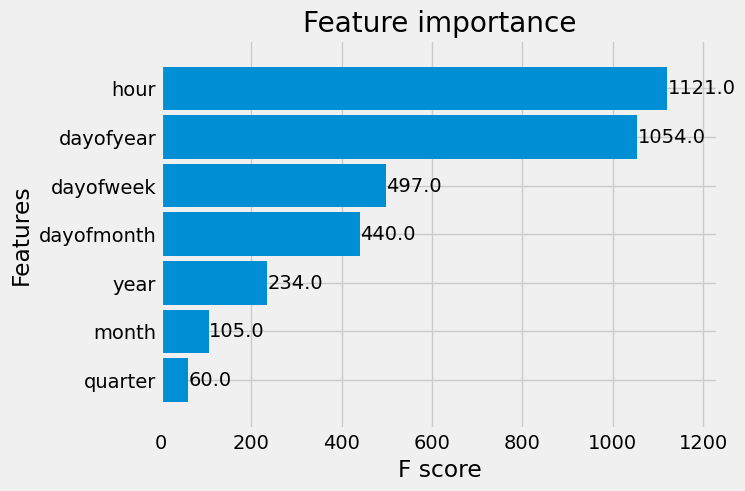

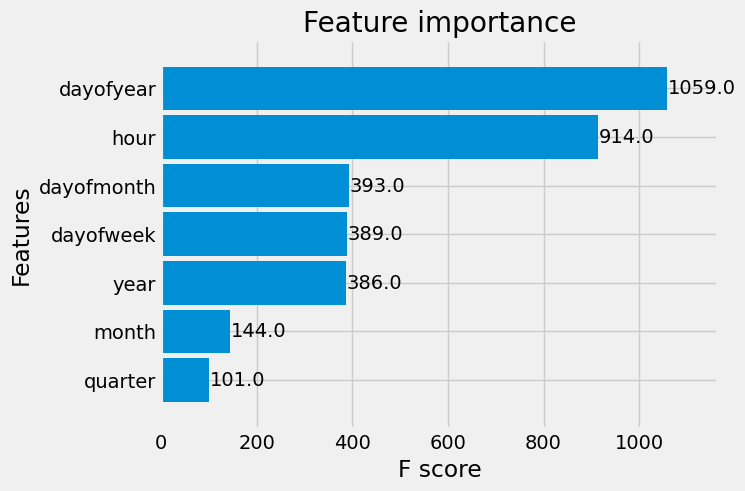

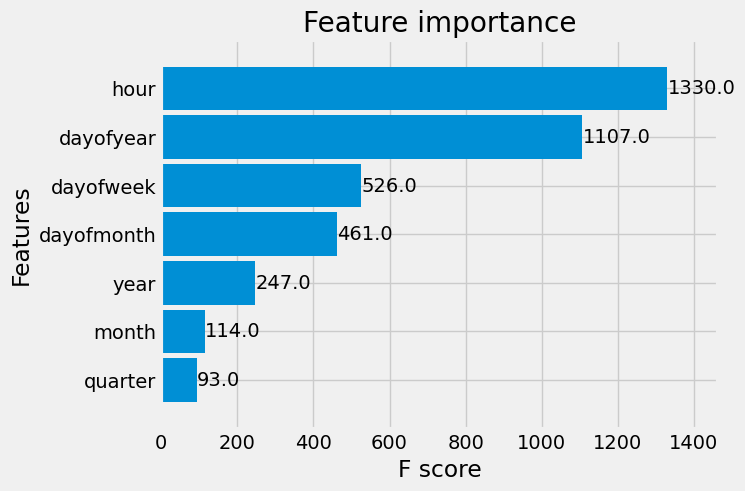

In [26]:
_ = plot_importance(reg_a, height=0.9) 
_ = plot_importance(reg_b, height=0.9) 
_ = plot_importance(reg_c, height=0.9) 

In [27]:
pv_test_a['pv_measurement_prediction'] = reg_a.predict(X_test_a)
pv_all_a = pd.concat([pv_test_a, pv_train_a], sort=False)
# 
pv_test_a.head(3)

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,28.701841
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,41.888641
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,50.311806


In [28]:
pv_test_b['pv_measurement_prediction'] = reg_b.predict(X_test_b)
pv_all_b = pd.concat([pv_test_b, pv_train_b], sort=False)
# 
pv_test_b.head(3)

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,17.407959
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,17.407959
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,17.407959


In [29]:
pv_test_c['pv_measurement_prediction'] = reg_c.predict(X_test_c)
pv_all_c = pd.concat([pv_test_c, pv_train_c], sort=False)
# 
pv_test_c.head(3)

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,-4.606462
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,-4.606462
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,-1.378388


In [30]:
pv_all_a.head()

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,28.701841
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,41.888641
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,50.311806
2022-01-01 04:00:00,0.0,2022-01-01 04:00:00,4,5,1,1,2022,1,1,55.957085
2022-01-01 05:00:00,0.0,2022-01-01 05:00:00,5,5,1,1,2022,1,1,52.052704


In [31]:
pv_all_b.head()

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,17.407959
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,17.407959
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,17.407959
2022-01-01 04:00:00,0.0,2022-01-01 04:00:00,4,5,1,1,2022,1,1,17.407959
2022-01-01 05:00:00,0.0,2022-01-01 05:00:00,5,5,1,1,2022,1,1,16.986561


In [32]:
pv_all_c.head()

,pv_measurement,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,pv_measurement_prediction
time,,,,,,,,,,
2022-01-01 01:00:00,0.0,2022-01-01 01:00:00,1,5,1,1,2022,1,1,-4.606462
2022-01-01 02:00:00,0.0,2022-01-01 02:00:00,2,5,1,1,2022,1,1,-4.606462
2022-01-01 03:00:00,0.0,2022-01-01 03:00:00,3,5,1,1,2022,1,1,-1.378388
2022-01-01 04:00:00,0.0,2022-01-01 04:00:00,4,5,1,1,2022,1,1,0.208037
2022-01-01 05:00:00,0.0,2022-01-01 05:00:00,5,5,1,1,2022,1,1,2.253487


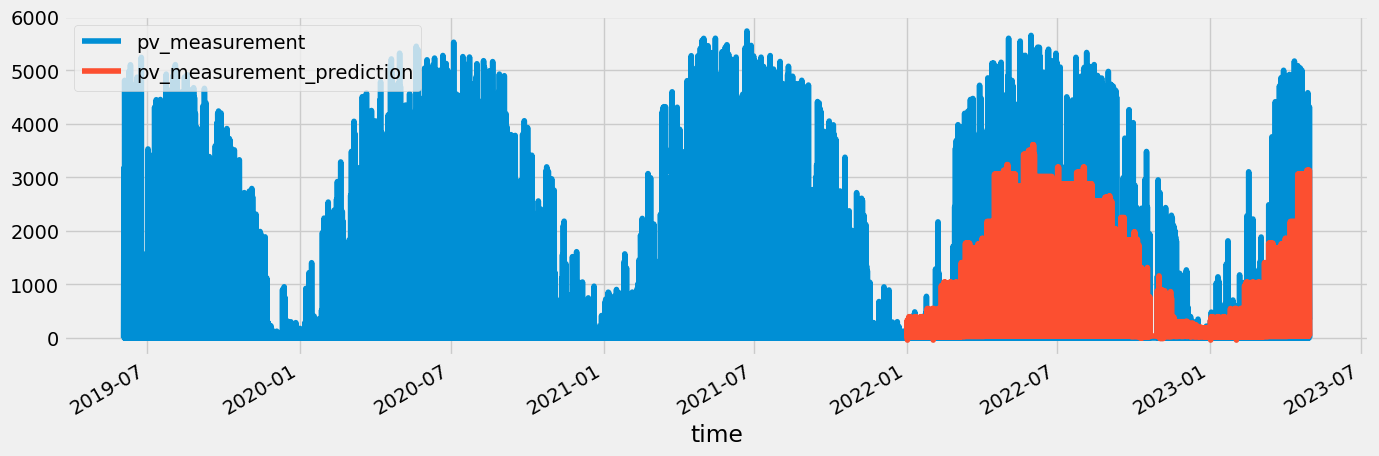

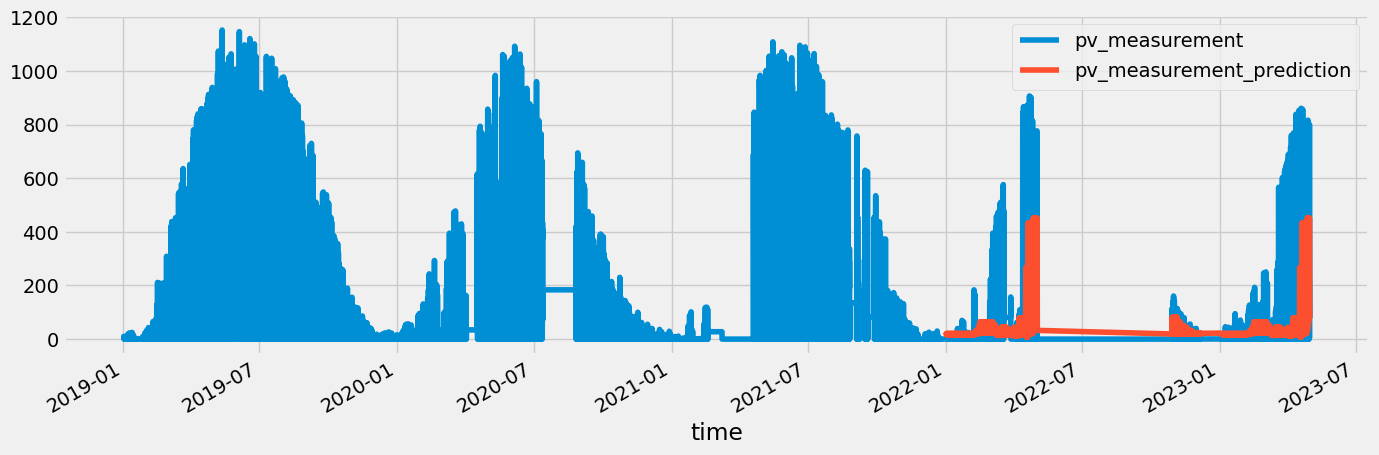

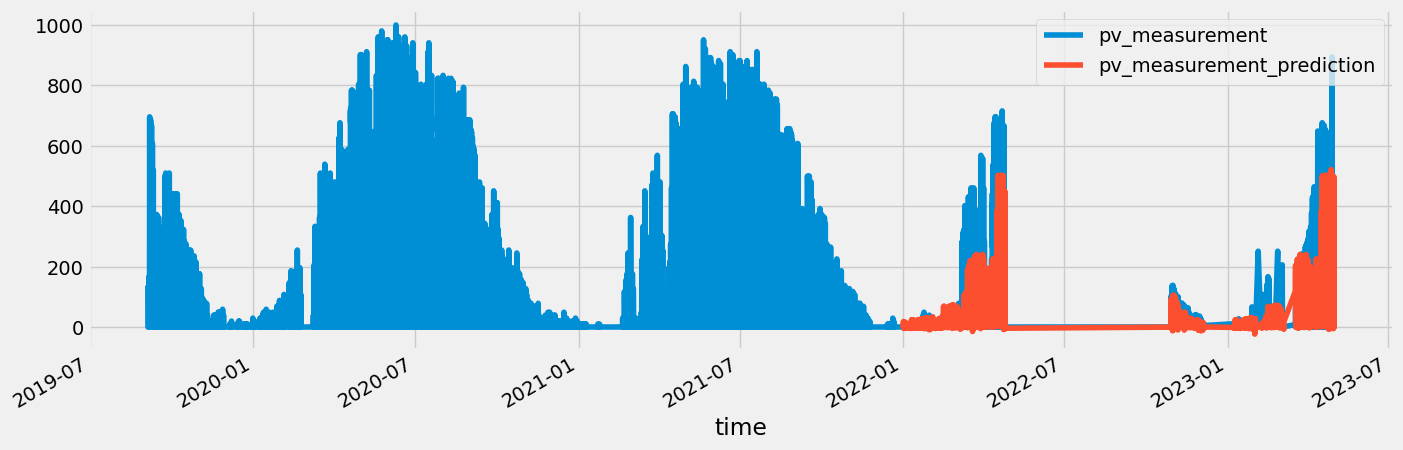

In [33]:
_ = pv_all_a[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))
_ = pv_all_b[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))
_ = pv_all_c[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))

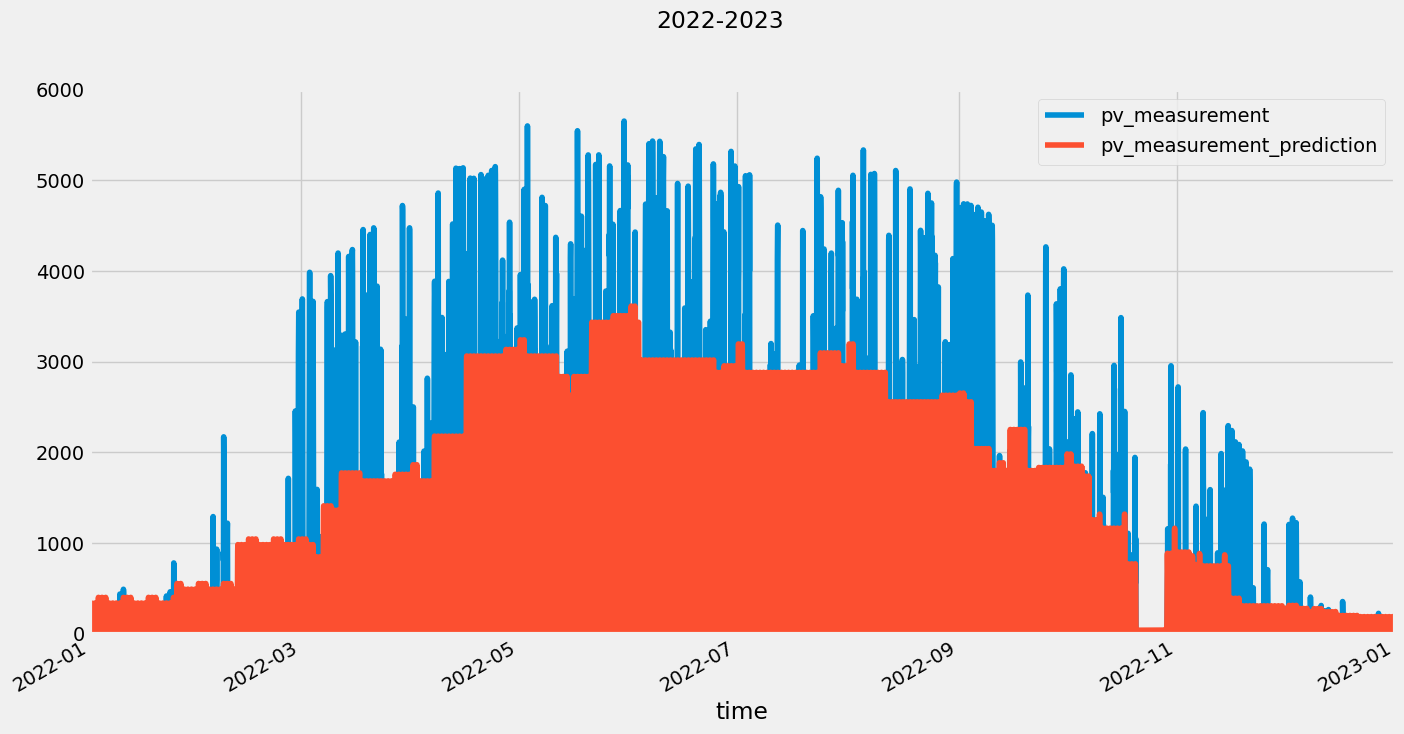

In [34]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pv_all_a[['pv_measurement','pv_measurement_prediction']].plot(ax=ax,figsize=(15, 8) )
ax.set_xbound(lower='2022-01-01', upper='2023-01-01')
ax.set_ylim(0, 6000)
plot = plt.suptitle('2022-2023')

In [35]:
mse = mean_squared_error(y_true=pv_test_b['pv_measurement'],
                   y_pred=pv_test_b['pv_measurement_prediction'])
print("Mean Squared Error: ", mse)

Mean Squared Error:  13117.169202731504


In [36]:
mAbsErr = mean_absolute_error(y_true=pv_test_b['pv_measurement'],
                              y_pred=pv_test_b['pv_measurement_prediction'])
print("Mean Absolute Error: ", mAbsErr)

Mean Absolute Error:  51.639580735290956


In [37]:
###################################
# KAGGLE 
###################################

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx
import scipy
import json
import sys
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
#sys.path.append('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/')
import utils
#import settings


plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [39]:
from sklearn.preprocessing import StandardScaler
import pickle #pour charger un scaler déjà entrainé

In [40]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [41]:
###############
# XGBoost model
###############

In [42]:
#function to apply XGBoost model
def create_features(df, label=None):
    """
    Creates time series features datetime column 
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

'''
Cette fonction prend en paramètre un fichier df et va lui appliquer le XGBoost model 
'''
def XGBoost(df):
    df['time'] = pd.to_datetime(df['time']) 
    df.dropna(subset=['pv_measurement'], inplace=True)  #Supprime les lignes vides
    '''
    plt.figure(figsize=(12, 6)) 
    plt.plot(df['time'], df['pv_measurement'])
    plt.title('pv_measurement')
    plt.xlabel('time')
    plt.ylabel('pv_measurement')
    plt.grid(True)
    plt.show()
    '''
    df.set_index('time', inplace=True)
    split_date_a = pd.to_datetime("2022-01-01")  # Date de séparation souhaitée
    pv_train_a = df.loc[df.index <= split_date_a].copy()
    pv_test_a = df.loc[df.index > split_date_a].copy()

    
    _ = pv_test_a \
        .rename(columns={'pv_measurement': 'TEST SET'}) \
        .join(pv_train_a.rename(columns={'pv_measurement': 'TRAINING SET'}), how='outer') \
        #.plot(figsize=(15,5), title='pv_measurement', style='')

    X_train_a, y_train_a = create_features(pv_train_a, label='pv_measurement')
    X_test_a, y_test_a = create_features(pv_test_a, label='pv_measurement')

    reg_a = xgb.XGBRegressor(n_estimators=1000)
    reg_a.fit(X_train_a, y_train_a,
        eval_set=[(X_train_a, y_train_a), (X_test_a, y_test_a)],
        early_stopping_rounds=50,
       verbose=True) 

    #_ = plot_importance(reg_a, height=0.9)

    pv_test_a['pv_measurement_prediction'] = reg_a.predict(X_test_a)
    pv_all_a = pd.concat([pv_test_a, pv_train_a], sort=False)
     
    #pv_test_a.head(3)

    graph = pv_all_a[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))

    '''
    mse = mean_squared_error(y_true=pv_test_b['pv_measurement'],
                   y_pred=pv_test_b['pv_measurement_prediction'])
    print("Mean Squared Error: ", mse)

    mAbsErr = mean_absolute_error(y_true=pv_test_b['pv_measurement'],
                              y_pred=pv_test_b['pv_measurement_prediction'])
    print("Mean Absolute Error: ", mAbsErr)
    '''

[0]	validation_0-rmse:961.68701	validation_1-rmse:943.54634
[1]	validation_0-rmse:828.04127	validation_1-rmse:814.82450
[2]	validation_0-rmse:748.33874	validation_1-rmse:750.96805
[3]	validation_0-rmse:700.12981	validation_1-rmse:718.14326
[4]	validation_0-rmse:671.90348	validation_1-rmse:703.27108
[5]	validation_0-rmse:656.03926	validation_1-rmse:693.80020
[6]	validation_0-rmse:642.69983	validation_1-rmse:695.05823
[7]	validation_0-rmse:634.18055	validation_1-rmse:693.07012
[8]	validation_0-rmse:622.70682	validation_1-rmse:695.50351
[9]	validation_0-rmse:613.58729	validation_1-rmse:700.96784
[10]	validation_0-rmse:610.07589	validation_1-rmse:701.37939
[11]	validation_0-rmse:599.57208	validation_1-rmse:702.97120
[12]	validation_0-rmse:589.54687	validation_1-rmse:710.84137
[13]	validation_0-rmse:578.04072	validation_1-rmse:713.68414
[14]	validation_0-rmse:571.72806	validation_1-rmse:716.77932
[15]	validation_0-rmse:564.72834	validation_1-rmse:717.31708
[16]	validation_0-rmse:560.35661	v

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


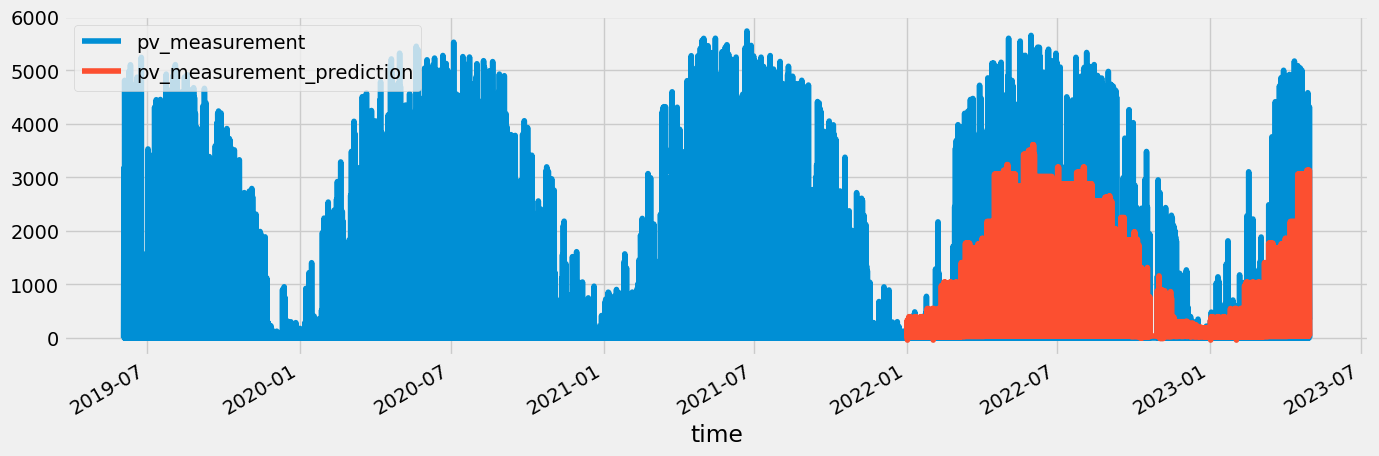

In [43]:
XGBoost(train_a)

In [44]:
#################################################################################

In [45]:
### import
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx
import scipy
import json
import sys
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
#sys.path.append('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/')
import utils
#import settings


plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [46]:
from sklearn.preprocessing import StandardScaler
import pickle #pour charger un scaler déjà entrainé

In [47]:
#################################################
# Chargement des données
#################################################

In [48]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [49]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [50]:
test.rename(columns={'time': 'date_forecast'}, inplace=True) #pour faire le merge

In [51]:
train_a.rename(columns={'time': 'date_forecast'}, inplace=True) #pour faire le merge
train_b.rename(columns={'time': 'date_forecast'}, inplace=True) #pour faire le merge
train_c.rename(columns={'time': 'date_forecast'}, inplace=True) #pour faire le merge

train_a.dropna(subset=['pv_measurement'], inplace=True)  #Supprime les lignes vides
train_b.dropna(subset=['pv_measurement'], inplace=True)  #Supprime les lignes vides
train_c.dropna(subset=['pv_measurement'], inplace=True)  #Supprime les lignes vides

In [52]:
train_b

,date_forecast,pv_measurement
0,2018-12-31 23:00:00,0.000000
1,2019-01-01 00:00:00,0.000000
2,2019-01-01 01:00:00,0.000000
3,2019-01-01 02:00:00,0.000000
4,2019-01-01 03:00:00,0.000000
...,...,...
32843,2023-04-30 19:00:00,0.828587
32844,2023-04-30 20:00:00,-0.000000
32845,2023-04-30 21:00:00,-0.000000
32846,2023-04-30 22:00:00,-0.000000


In [53]:
test["date_forecast"] = pd.to_datetime(test["date_forecast"]) #mettre le bon type

In [54]:
test

,id,date_forecast,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [55]:
#regroupement selon la 

In [56]:
# Lecture des données météo associée :
merged_df_pre_a = pd.merge(X_train_observed_a, train_a, on='date_forecast', how='inner')
#merged_df_a = merged_df_pre_a[merged_df_pre_a["location"]=="A"]
#merged_df_a = pd.merge(merged_df_a, train_a, on='date_forecast', how='outer')

merged_df_pre_b = pd.merge(X_train_observed_b, train_b, on='date_forecast', how='inner')
#merged_df_b = merged_df_pre_b[merged_df_pre_b["location"]=="B"]

merged_df_pre_c = pd.merge(X_train_observed_c, train_c, on='date_forecast', how='inner')
#merged_df_c = merged_df_pre_c[merged_df_pre_c["location"]=="C"]

In [57]:
merged_df_pre_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,280.299988,0.0,0.000000,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0,0.00
1,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,280.299988,0.0,0.000000,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0,0.00
2,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,280.200012,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.599976,0.0,0.0,992.099976,998.099976,0.0,0.1,66.000000,1004.099976,NaN,0.0,0.0,-0.0,0.2,9.741000,-3.910000,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0,0.00
3,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,281.299988,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1004.400024,0.0,0.0,991.799988,997.799988,0.0,0.2,71.099998,1003.799988,NaN,0.0,0.0,-0.0,0.7,23.541000,-1.986000,0.0,286.899994,100.000000,2104.600098,2.8,-2.7,0.8,-0.0,0.00
4,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,282.299988,4.3,7743.299805,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1003.400024,0.0,0.0,990.900024,996.900024,0.0,0.1,78.500000,1002.900024,NaN,0.0,0.0,-0.0,0.3,37.040001,1.401000,0.0,286.500000,100.000000,2681.600098,2.7,-2.5,1.0,-0.0,19.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29662,2022-10-20 20:00:00,5.9,1.279,1291.500000,0.000000,0.0,1302.500000,0.0,276.000000,0.0,0.000000,0.0,0.0,48.900002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.599976,0.0,0.0,1006.700012,1012.900024,0.0,0.0,78.599998,1019.200012,NaN,0.0,0.0,-0.0,0.0,307.263000,-27.830000,0.0,278.399994,59.400002,41022.398438,2.0,0.6,1.9,-0.0,0.00
29663,2022-10-20 21:00:00,5.7,1.283,NaN,0.000000,0.0,1009.299988,0.0,275.500000,0.0,0.000000,0.0,0.0,18.700001,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.299988,0.0,0.0,1006.500000,1012.700012,0.0,0.0,78.699997,1019.000000,NaN,0.0,0.0,-0.0,0.0,323.514008,-32.546001,0.0,278.000000,23.799999,38581.898438,1.8,0.3,1.8,-0.0,0.00
29664,2022-10-20 22:00:00,5.4,1.286,NaN,0.000000,0.0,149.500000,0.0,274.700012,0.0,0.000000,0.0,0.0,12.200000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.099976,0.0,0.0,1006.200012,1012.400024,0.0,0.0,79.800003,1018.700012,NaN,0.0,0.0,-0.0,0.0,341.010986,-35.674000,0.0,277.600006,12.200000,39697.699219,1.5,0.1,1.5,-0.0,0.00
29665,2022-10-20 23:00:00,5.3,1.289,NaN,0.000000,0.0,NaN,0.0,274.399994,0.0,0.000000,0.0,0.0,5.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.799988,0.0,0.0,1006.000000,1012.200012,0.0,0.0,80.300003,1018.500000,NaN,0.0,0.0,-0.0,0.0,359.334991,-36.821999,0.0,277.299988,5.500000,28090.099609,1.3,-0.0,1.3,-0.0,0.00


In [58]:
#################################################
# Pre-processing
#################################################

In [59]:
def sklearn_z_score_normalize_dataframe(df,return_scaler=False,scaler=None):
    """
    Normalizes a DataFrame using z-score normalization (mean and standard deviation) from Scikit-Learn.

    Parameters:
    df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    pd.DataFrame: The z-score normalized DataFrame.
    """
    if scaler == None :
      # Create a StandardScaler instance
      scaler = StandardScaler()

      # Fit the scaler on the DataFrame and transform the data
      normalized_data = scaler.fit_transform(df)

    else : normalized_data = scaler.transform(df)

    # Create a new DataFrame with the scaled data
    normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

    # retourner le scaler
    if return_scaler :
      return normalized_df,scaler
    return normalized_df

In [60]:
#normalize function
def normalize_dataframe(df):
    """
    Normalizes a DataFrame using the min-max scaling method.

    Parameters:
    df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    pd.DataFrame: The normalized DataFrame.
    """
    # Copy the input DataFrame to avoid modifying the original
    normalized_df = df.copy()

    # Iterate through each numeric column and apply min-max scaling
    for column in normalized_df.columns:
        if pd.api.types.is_numeric_dtype(normalized_df[column]):
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            if min_val != max_val:
                normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

    return normalized_df

In [61]:
merged_df_pre_a = normalize_dataframe(merged_df_pre_a)

In [62]:
# Preprocessing :
def preprocessing_test(df,scaler):
  # gestion des Nan
  df = df.dropna(axis=1, how='any')
  # gestion index
  df.reset_index(drop=True, inplace=True)
  #suppresion colonne date_calc
  df = df.drop(["date_calc","id","prediction"],axis=1)
  # Transformation de la colonne location
  df['location'] = df['location'].replace({'A': 1, 'B': 2, 'C': 3})
  #placer la colonne location en premier
  nouvel_ordre_colonnes = ['location'] + [col for col in df.columns if col != 'location']
  df = df[nouvel_ordre_colonnes]
  # gestion type de la date
  df[('date_forecast')] = df[('date_forecast')].values.astype("float64")
  # normalisation de X
  df = sklearn_z_score_normalize_dataframe(df,scaler=scaler) # moyenne std
  #X = normalize_dataframe(X) # min max
  return df

In [63]:
scaler = None

In [64]:
#merged_df_a_preprocessed = preprocessing_test(merged_df_a,scaler=scaler)
#merged_df_b_preprocessed = preprocessing_test(merged_df_b,scaler=scaler)
#merged_df_c_preprocessed = preprocessing_test(merged_df_c,scaler=scaler)

In [65]:
#################################################
# XGBoost Model
#################################################

In [66]:
#function to apply XGBoost model
def create_features(df, label):
    """
    Creates time series features including datetime and additional columns from the original DataFrame
    """
    '''
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    '''
    # Add additional columns to X
    additional_columns = [
        'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J',
        'clear_sky_rad:W', 'dew_or_rime:idx', 'dew_point_2m:K', 'diffuse_rad:W',
        'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p',
        'elevation:m', 'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
        'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
        'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx', 'pressure_100m:hPa',
        'pressure_50m:hPa', 'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
        'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx', 'snow_melt_10min:mm',
        'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
        't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
        'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms'
    ]
    
    X = df[additional_columns]
    
    if label:
        y = df[label]
        return X, y
    return X

In [67]:
split_date_a = pd.to_datetime("2022-01-01")

In [68]:
merged_df_pre_a.index = pd.to_datetime(merged_df_pre_a.index)

In [69]:
merged_df_pre_a 

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
1970-01-01 00:00:00.000000000,2019-06-02 22:00:00,0.416667,0.301419,0.139594,0.000000,0.000000,0.147245,0.5,0.685315,0.000000,0.00000,0.0,0.0,0.987,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.626881,0.0,0.0,0.627789,0.627016,0.0,0.000000,0.652005,0.624624,NaN,0.0,0.0,0.0,0.014493,0.952326,0.468228,0.0,0.608108,1.000,0.554610,0.243421,0.189744,0.474860,0.0,0.000000
1970-01-01 00:00:00.000000001,2019-06-02 23:00:00,0.416667,0.283688,0.136236,0.000000,0.000000,0.143704,0.5,0.685315,0.000000,0.00000,0.0,0.0,0.996,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.613842,0.0,0.0,0.615619,0.613911,0.0,0.000000,0.601552,0.611611,NaN,0.0,0.0,0.0,0.028986,0.990961,0.456297,0.0,0.628378,1.000,0.583542,0.230263,0.194872,0.519553,0.0,0.000000
1970-01-01 00:00:00.000000002,2019-06-03 00:00:00,0.416667,0.269503,0.133350,0.000000,0.000000,0.140659,0.5,0.682984,0.000000,0.00000,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.604814,0.0,0.0,0.606491,0.604838,0.0,0.071429,0.560155,0.602602,NaN,0.0,0.0,0.0,0.028986,0.027026,0.461135,0.0,0.632883,1.000,0.285393,0.210526,0.215385,0.558659,0.0,0.000000
1970-01-01 00:00:00.000000003,2019-06-03 01:00:00,0.446429,0.258865,0.110612,0.000000,0.000000,0.116673,0.5,0.708625,0.000000,0.00000,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.602809,0.0,0.0,0.603448,0.601814,0.0,0.142857,0.626132,0.599599,NaN,0.0,0.0,0.0,0.101449,0.065361,0.480410,0.0,0.630631,1.000,0.027394,0.184211,0.235897,0.564246,0.0,0.000000
1970-01-01 00:00:00.000000004,2019-06-03 02:00:00,0.482143,0.262411,0.087857,0.002179,0.011739,0.092669,0.5,0.731935,0.012771,0.00655,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.592779,0.0,0.0,0.594321,0.592742,0.0,0.071429,0.721863,0.590590,NaN,0.0,0.0,0.0,0.043478,0.102860,0.514341,0.0,0.621622,1.000,0.035498,0.177632,0.246154,0.575419,0.0,0.003377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000029662,2022-10-20 20:00:00,0.309524,0.475177,0.102734,0.000000,0.000000,0.109306,0.5,0.585082,0.000000,0.00000,0.0,0.0,0.489,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.755266,0.0,0.0,0.754564,0.754032,0.0,0.000000,0.723156,0.753753,NaN,0.0,0.0,0.0,0.000000,0.853513,0.221507,0.0,0.439189,0.594,0.574026,0.131579,0.405128,0.625698,0.0,0.000000
1970-01-01 00:00:00.000029663,2022-10-20 21:00:00,0.297619,0.489362,NaN,0.000000,0.000000,0.084162,0.5,0.573427,0.000000,0.00000,0.0,0.0,0.187,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752257,0.0,0.0,0.752535,0.752016,0.0,0.000000,0.724450,0.751751,NaN,0.0,0.0,0.0,0.000000,0.898657,0.174262,0.0,0.430180,0.238,0.539747,0.118421,0.389744,0.620112,0.0,0.000000
1970-01-01 00:00:00.000029664,2022-10-20 22:00:00,0.279762,0.500000,NaN,0.000000,0.000000,0.010428,0.5,0.554779,0.000000,0.00000,0.0,0.0,0.122,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750251,0.0,0.0,0.749493,0.748992,0.0,0.000000,0.738680,0.748748,NaN,0.0,0.0,0.0,0.000000,0.947262,0.142926,0.0,0.421172,0.122,0.555419,0.098684,0.379487,0.603352,0.0,0.000000
1970-01-01 00:00:00.000029665,2022-10-20 23:00:00,0.273810,0.510638,NaN,0.000000,0.000000,NaN,0.5,0.547786,0.000000,0.00000,0.0,0.0,0.055,

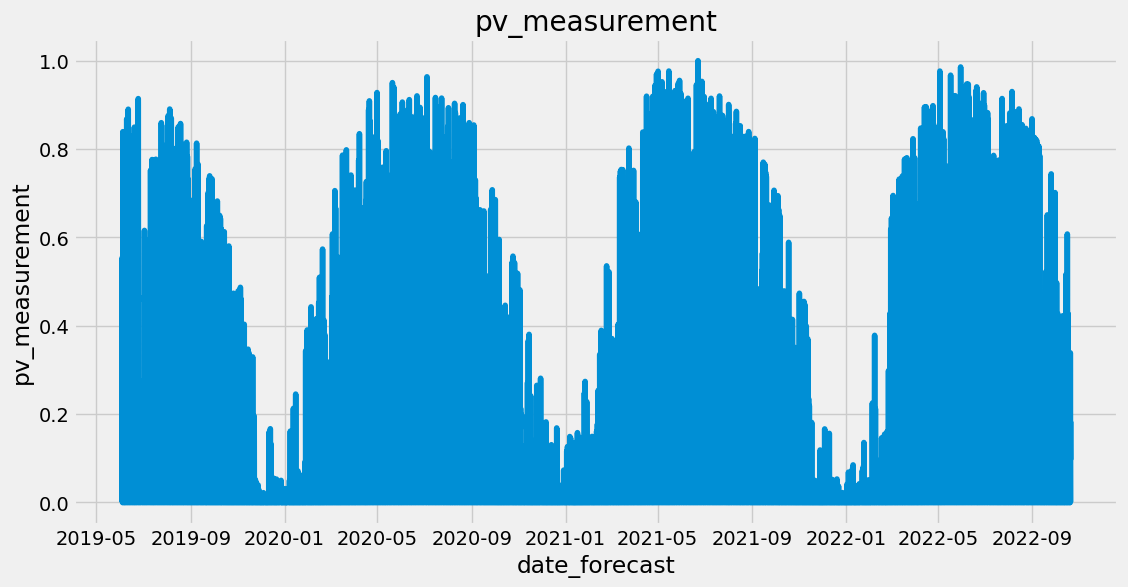

In [70]:
plt.figure(figsize=(12, 6)) 
plt.plot(merged_df_pre_a['date_forecast'], merged_df_pre_a['pv_measurement'])
plt.title('pv_measurement')
plt.xlabel('date_forecast') 
plt.ylabel('pv_measurement')
plt.grid(True)
plt.show()    

In [71]:
pv_train_a = merged_df_pre_a[merged_df_pre_a['date_forecast'] <= split_date_a].copy()
pv_test_a = merged_df_pre_a[merged_df_pre_a['date_forecast'] > split_date_a].copy()

In [72]:
pv_test_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
1970-01-01 00:00:00.000022635,2022-01-01 01:00:00,0.214286,0.521277,NaN,0.0,0.0,NaN,0.5,0.482518,0.0,0.0,0.0,0.0,0.042,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682046,0.0,0.0,0.679513,0.679435,0.000000,0.0,0.827943,0.679679,NaN,0.0,0.0,0.0,0.0,0.091296,0.033971,0.0,0.342343,0.042,0.508787,0.151316,0.482051,0.474860,0.0,0.0
1970-01-01 00:00:00.000022636,2022-01-01 02:00:00,0.202381,0.539007,NaN,0.0,0.0,0.063658,0.0,0.468532,0.0,0.0,0.0,0.0,0.103,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.693080,0.0,0.0,0.690669,0.691532,0.100719,0.0,0.809832,0.692692,NaN,0.0,0.0,0.0,0.0,0.142240,0.079062,0.0,0.342343,0.103,0.558332,0.144737,0.487179,0.497207,0.0,0.0
1970-01-01 00:00:00.000022637,2022-01-01 03:00:00,0.196429,0.539007,NaN,0.0,0.0,0.065364,0.0,0.461539,0.0,0.0,0.0,0.0,0.445,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.704112,0.0,0.0,0.701825,0.702621,0.226619,0.0,0.785252,0.703703,NaN,0.0,0.0,0.0,0.0,0.187406,0.136935,0.0,0.340090,0.445,0.442640,0.131579,0.476923,0.513966,0.0,0.0
1970-01-01 00:00:00.000022638,2022-01-01 04:00:00,0.184524,0.549645,NaN,0.0,0.0,0.079806,0.0,0.442890,0.0,0.0,0.0,0.0,0.403,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.708125,0.0,0.0,0.704868,0.705645,0.402878,0.0,0.760673,0.706706,NaN,0.0,0.0,0.0,0.0,0.228005,0.201811,0.0,0.340090,0.403,0.300318,0.098684,0.451282,0.519553,0.0,0.0
1970-01-01 00:00:00.000022639,2022-01-01 05:00:00,0.178571,0.553191,NaN,0.0,0.0,0.070956,0.0,0.438229,0.0,0.0,0.0,0.0,0.523,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.715145,0.0,0.0,0.712981,0.713710,0.693046,0.0,0.737387,0.714714,NaN,0.0,0.0,0.0,0.0,0.265606,0.269022,0.0,0.335586,0.583,0.249441,0.072368,0.430769,0.525140,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000029662,2022-10-20 20:00:00,0.309524,0.475177,0.102734,0.0,0.0,0.109306,0.5,0.585082,0.0,0.0,0.0,0.0,0.489,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.755266,0.0,0.0,0.754564,0.754032,0.000000,0.0,0.723156,0.753753,NaN,0.0,0.0,0.0,0.0,0.853513,0.221507,0.0,0.439189,0.594,0.574026,0.131579,0.405128,0.625698,0.0,0.0
1970-01-01 00:00:00.000029663,2022-10-20 21:00:00,0.297619,0.489362,NaN,0.0,0.0,0.084162,0.5,0.573427,0.0,0.0,0.0,0.0,0.187,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752257,0.0,0.0,0.752535,0.752016,0.000000,0.0,0.724450,0.751751,NaN,0.0,0.0,0.0,0.0,0.898657,0.174262,0.0,0.430180,0.238,0.539747,0.118421,0.389744,0.620112,0.0,0.0
1970-01-01 00:00:00.000029664,2022-10-20 22:00:00,0.279762,0.500000,NaN,0.0,0.0,0.010428,0.5,0.554779,0.0,0.0,0.0,0.0,0.122,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750251,0.0,0.0,0.749493,0.748992,0.000000,0.0,0.738680,0.748748,NaN,0.0,0.0,0.0,0.0,0.947262,0.142926,0.0,0.421172,0.122,0.555419,0.098684,0.379487,0.603352,0.0,0.0
1970-01-01 00:00:00.000029665,2022-10-20 23:00:00,0.273810,0.510638,NaN,0.0,0.0,NaN,0.5,0.547786,0.0,0.0,0.0,0.0,0.055,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.747242,0.0,0.0,0.747464,0.746976,0.000000,0.0,0.745149,0.746746,NaN,0.0,0.0,0.0,0.0,0.998164,0.131425,0.0,0.414414,0.055,0.392381,0.085526,0.374359,0.592179,0.0,0.0


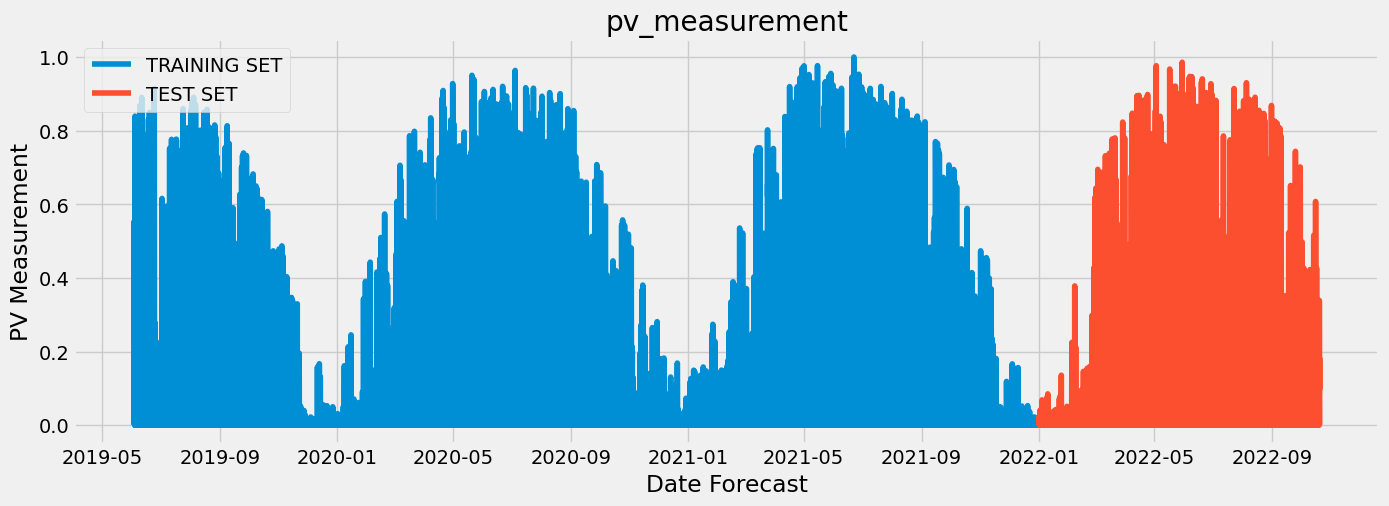

In [73]:
pv_train_a['date_forecast'] = pd.to_datetime(pv_train_a['date_forecast'])
pv_test_a['date_forecast'] = pd.to_datetime(pv_test_a['date_forecast'])

# Créez le graphique en fonction de "date_forecast"
plt.figure(figsize=(15, 5))
plt.plot(pv_train_a['date_forecast'], pv_train_a['pv_measurement'], label='TRAINING SET')
plt.plot(pv_test_a['date_forecast'], pv_test_a['pv_measurement'], label='TEST SET')
plt.title('pv_measurement')
plt.xlabel('Date Forecast')
plt.ylabel('PV Measurement')
plt.legend()
plt.show()

In [74]:
pv_test_a.isnull().sum()

date_forecast                        0
absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m              1633
clear_sky_energy_1h:J                0
clear_sky_rad:W                      0
cloud_base_agl:m                   698
dew_or_rime:idx                      0
dew_point_2m:K                       0
diffuse_rad:W                        0
diffuse_rad_1h:J                     0
direct_rad:W                         0
direct_rad_1h:J                      0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
is_day:idx                           0
is_in_shadow:idx                     0
msl_pressure:hPa                     0
precip_5min:mm                       0
precip_type_5min:idx                 0
pressure_100m:hPa        

In [75]:
X_train_a, y_train_a = create_features(pv_train_a, label='pv_measurement')
X_test_a, y_test_a = create_features(pv_test_a, label='pv_measurement')

In [76]:
reg_a = xgb.XGBRegressor(n_estimators=1000)
reg_a.fit(X_train_a, y_train_a,
          eval_set=[(X_train_a, y_train_a), (X_test_a, y_test_a)],
          early_stopping_rounds=50,
          verbose=True) 

[0]	validation_0-rmse:0.15567	validation_1-rmse:0.16777
[1]	validation_0-rmse:0.12332	validation_1-rmse:0.13487
[2]	validation_0-rmse:0.10290	validation_1-rmse:0.11504
[3]	validation_0-rmse:0.09048	validation_1-rmse:0.10252
[4]	validation_0-rmse:0.08296	validation_1-rmse:0.09526
[5]	validation_0-rmse:0.07831	validation_1-rmse:0.09139
[6]	validation_0-rmse:0.07503	validation_1-rmse:0.08867
[7]	validation_0-rmse:0.07274	validation_1-rmse:0.08761
[8]	validation_0-rmse:0.07120	validation_1-rmse:0.08729


[9]	validation_0-rmse:0.06997	validation_1-rmse:0.08668
[10]	validation_0-rmse:0.06860	validation_1-rmse:0.08663
[11]	validation_0-rmse:0.06750	validation_1-rmse:0.08663
[12]	validation_0-rmse:0.06625	validation_1-rmse:0.08665
[13]	validation_0-rmse:0.06564	validation_1-rmse:0.08719
[14]	validation_0-rmse:0.06488	validation_1-rmse:0.08705
[15]	validation_0-rmse:0.06444	validation_1-rmse:0.08696
[16]	validation_0-rmse:0.06339	validation_1-rmse:0.08718
[17]	validation_0-rmse:0.06262	validation_1-rmse:0.08747
[18]	validation_0-rmse:0.06194	validation_1-rmse:0.08764
[19]	validation_0-rmse:0.06123	validation_1-rmse:0.08758
[20]	validation_0-rmse:0.06067	validation_1-rmse:0.08771
[21]	validation_0-rmse:0.05980	validation_1-rmse:0.08792
[22]	validation_0-rmse:0.05912	validation_1-rmse:0.08810
[23]	validation_0-rmse:0.05884	validation_1-rmse:0.08816
[24]	validation_0-rmse:0.05831	validation_1-rmse:0.08817
[25]	validation_0-rmse:0.05811	validation_1-rmse:0.08808
[26]	validation_0-rmse:0.05770	v

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:0.04779	validation_1-rmse:0.08919
[52]	validation_0-rmse:0.04748	validation_1-rmse:0.08913
[53]	validation_0-rmse:0.04732	validation_1-rmse:0.08916
[54]	validation_0-rmse:0.04699	validation_1-rmse:0.08923
[55]	validation_0-rmse:0.04637	validation_1-rmse:0.08913
[56]	validation_0-rmse:0.04621	validation_1-rmse:0.08925
[57]	validation_0-rmse:0.04602	validation_1-rmse:0.08930
[58]	validation_0-rmse:0.04574	validation_1-rmse:0.08921
[59]	validation_0-rmse:0.04541	validation_1-rmse:0.08926
[60]	validation_0-rmse:0.04505	validation_1-rmse:0.08923


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
text_representation_of_trees = reg_a.get_booster().get_dump()
print(text_representation_of_trees)

['0:[direct_rad:W<0.150226519] yes=1,no=2,missing=2\n\t1:[diffuse_rad:W<0.119988121] yes=3,no=4,missing=4\n\t\t3:[diffuse_rad:W<0.0478170477] yes=7,no=8,missing=8\n\t\t\t7:[diffuse_rad:W<0.018117018] yes=15,no=16,missing=16\n\t\t\t\t15:[sun_elevation:d<0.484156668] yes=31,no=32,missing=32\n\t\t\t\t\t31:leaf=-0.0338356681\n\t\t\t\t\t32:[sun_azimuth:d<0.421557665] yes=63,no=64,missing=64\n\t\t\t\t\t\t63:leaf=-0.029916333\n\t\t\t\t\t\t64:leaf=-0.0336321145\n\t\t\t\t16:[sun_azimuth:d<0.484004855] yes=33,no=34,missing=34\n\t\t\t\t\t33:[direct_rad_1h:J<0.00609947741] yes=65,no=66,missing=66\n\t\t\t\t\t\t65:leaf=-0.0245781392\n\t\t\t\t\t\t66:leaf=-0.00622089999\n\t\t\t\t\t34:leaf=-0.0322331898\n\t\t\t8:[direct_rad:W<0.0561157428] yes=17,no=18,missing=18\n\t\t\t\t17:[sun_azimuth:d<0.524517775] yes=35,no=36,missing=36\n\t\t\t\t\t35:[direct_rad:W<0.0211895369] yes=67,no=68,missing=68\n\t\t\t\t\t\t67:leaf=-0.0185878109\n\t\t\t\t\t\t68:leaf=-0.00454512751\n\t\t\t\t\t36:[clear_sky_rad:W<0.311092496

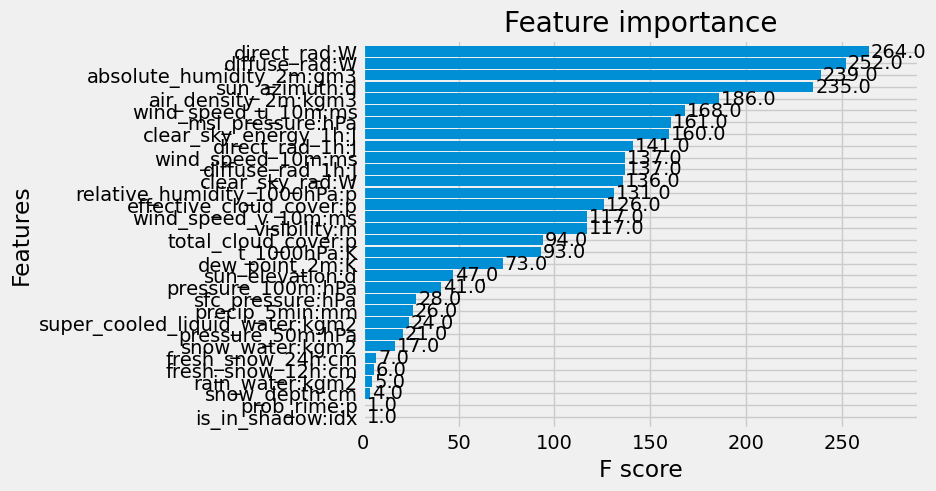

In [78]:
_ = plot_importance(reg_a, height=0.9) 

In [79]:
pv_test_a['pv_measurement_prediction'] = reg_a.predict(X_test_a)
pv_all_a = pd.concat([pv_test_a, pv_train_a], sort=False)

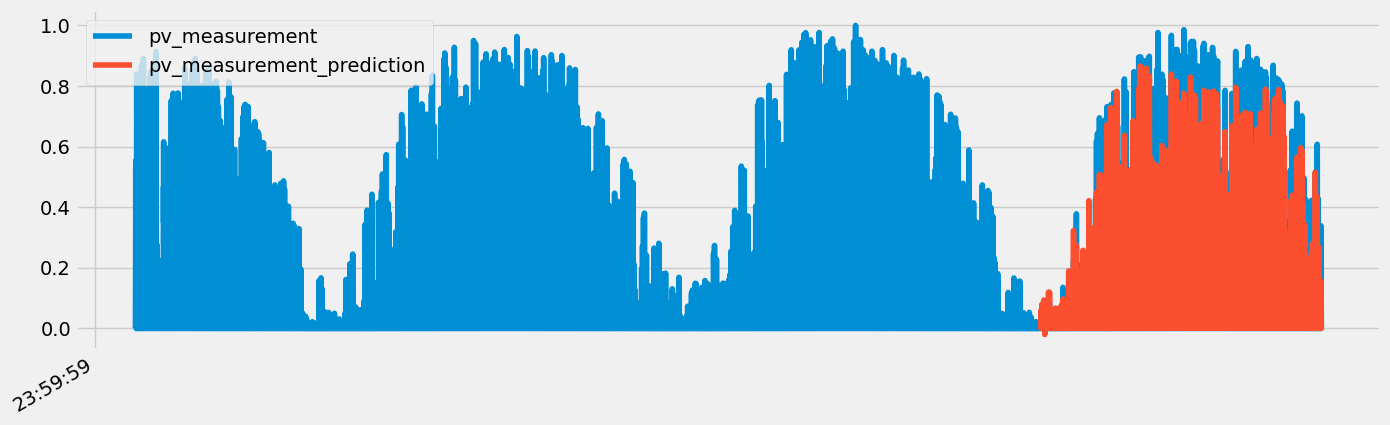

In [86]:
graph = pv_all_a[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))

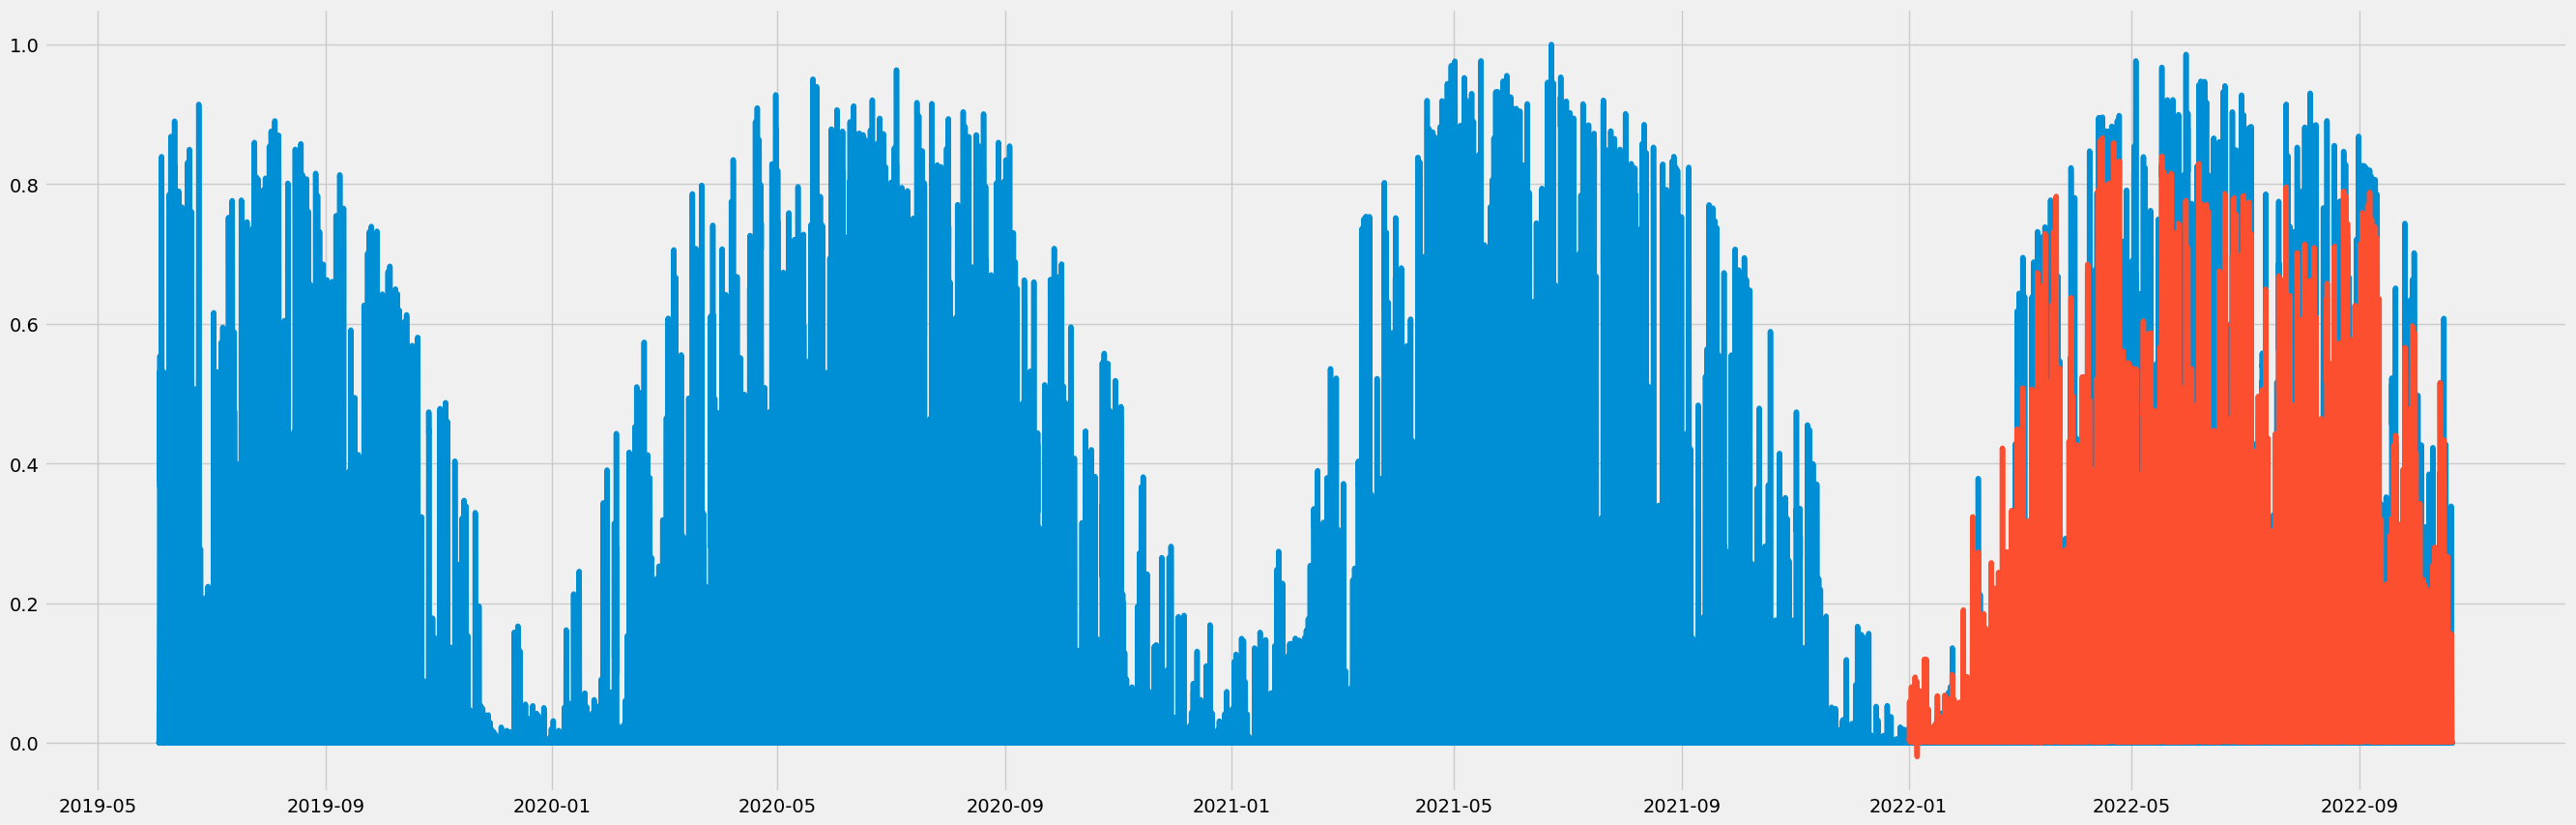

In [88]:
plt.figure(figsize=(30,10))
plt.plot(pv_all_a['date_forecast'], pv_all_a[['pv_measurement','pv_measurement_prediction']])


In [81]:
def XGBoost(df):
    df['time'] = pd.to_datetime(df['time']) 
    df.dropna(subset=['pv_measurement'], inplace=True)  #Supprime les lignes vides
    '''
    plt.figure(figsize=(12, 6)) 
    plt.plot(df['time'], df['pv_measurement'])
    plt.title('pv_measurement')
    plt.xlabel('time')
    plt.ylabel('pv_measurement')
    plt.grid(True)
    plt.show()
    '''
    df.set_index('time', inplace=True)
    split_date_a = pd.to_datetime("2022-01-01")  # Date de séparation souhaitée
    pv_train_a = df.loc[df.index <= split_date_a].copy()
    pv_test_a = df.loc[df.index > split_date_a].copy()

    
    _ = pv_test_a \
        .rename(columns={'pv_measurement': 'TEST SET'}) \
        .join(pv_train_a.rename(columns={'pv_measurement': 'TRAINING SET'}), how='outer') \
        #.plot(figsize=(15,5), title='pv_measurement', style='')

    X_train_a, y_train_a = create_features(pv_train_a, label='pv_measurement')
    X_test_a, y_test_a = create_features(pv_test_a, label='pv_measurement')

    reg_a = xgb.XGBRegressor(n_estimators=1000)
    reg_a.fit(X_train_a, y_train_a,
        eval_set=[(X_train_a, y_train_a), (X_test_a, y_test_a)],
        early_stopping_rounds=50,
       verbose=True) 

    #_ = plot_importance(reg_a, height=0.9)

    pv_test_a['pv_measurement_prediction'] = reg_a.predict(X_test_a)
    pv_all_a = pd.concat([pv_test_a, pv_train_a], sort=False)
     
    #pv_test_a.head(3)

    graph = pv_all_a[['pv_measurement','pv_measurement_prediction']].plot(figsize=(15, 5))

    '''
    mse = mean_squared_error(y_true=pv_test_b['pv_measurement'],
                   y_pred=pv_test_b['pv_measurement_prediction'])
    print("Mean Squared Error: ", mse)

    mAbsErr = mean_absolute_error(y_true=pv_test_b['pv_measurement'],
                              y_pred=pv_test_b['pv_measurement_prediction'])
    print("Mean Absolute Error: ", mAbsErr)
    '''

In [84]:
pv_all_a.sort_values(by='date_forecast')

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement,pv_measurement_prediction
1970-01-01 00:00:00.000000000,2019-06-02 22:00:00,0.416667,0.301419,0.139594,0.000000,0.000000,0.147245,0.5,0.685315,0.000000,0.00000,0.0,0.0,0.987,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.626881,0.0,0.0,0.627789,0.627016,0.0,0.000000,0.652005,0.624624,NaN,0.0,0.0,0.0,0.014493,0.952326,0.468228,0.0,0.608108,1.000,0.554610,0.243421,0.189744,0.474860,0.0,0.000000,NaN
1970-01-01 00:00:00.000000001,2019-06-02 23:00:00,0.416667,0.283688,0.136236,0.000000,0.000000,0.143704,0.5,0.685315,0.000000,0.00000,0.0,0.0,0.996,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.613842,0.0,0.0,0.615619,0.613911,0.0,0.000000,0.601552,0.611611,NaN,0.0,0.0,0.0,0.028986,0.990961,0.456297,0.0,0.628378,1.000,0.583542,0.230263,0.194872,0.519553,0.0,0.000000,NaN
1970-01-01 00:00:00.000000002,2019-06-03 00:00:00,0.416667,0.269503,0.133350,0.000000,0.000000,0.140659,0.5,0.682984,0.000000,0.00000,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.604814,0.0,0.0,0.606491,0.604838,0.0,0.071429,0.560155,0.602602,NaN,0.0,0.0,0.0,0.028986,0.027026,0.461135,0.0,0.632883,1.000,0.285393,0.210526,0.215385,0.558659,0.0,0.000000,NaN
1970-01-01 00:00:00.000000003,2019-06-03 01:00:00,0.446429,0.258865,0.110612,0.000000,0.000000,0.116673,0.5,0.708625,0.000000,0.00000,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.602809,0.0,0.0,0.603448,0.601814,0.0,0.142857,0.626132,0.599599,NaN,0.0,0.0,0.0,0.101449,0.065361,0.480410,0.0,0.630631,1.000,0.027394,0.184211,0.235897,0.564246,0.0,0.000000,NaN
1970-01-01 00:00:00.000000004,2019-06-03 02:00:00,0.482143,0.262411,0.087857,0.002179,0.011739,0.092669,0.5,0.731935,0.012771,0.00655,0.0,0.0,1.000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.592779,0.0,0.0,0.594321,0.592742,0.0,0.071429,0.721863,0.590590,NaN,0.0,0.0,0.0,0.043478,0.102860,0.514341,0.0,0.621622,1.000,0.035498,0.177632,0.246154,0.575419,0.0,0.003377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000029662,2022-10-20 20:00:00,0.309524,0.475177,0.102734,0.000000,0.000000,0.109306,0.5,0.585082,0.000000,0.00000,0.0,0.0,0.489,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.755266,0.0,0.0,0.754564,0.754032,0.0,0.000000,0.723156,0.753753,NaN,0.0,0.0,0.0,0.000000,0.853513,0.221507,0.0,0.439189,0.594,0.574026,0.131579,0.405128,0.625698,0.0,0.000000,0.001317
1970-01-01 00:00:00.000029663,2022-10-20 21:00:00,0.297619,0.489362,NaN,0.000000,0.000000,0.084162,0.5,0.573427,0.000000,0.00000,0.0,0.0,0.187,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752257,0.0,0.0,0.752535,0.752016,0.0,0.000000,0.724450,0.751751,NaN,0.0,0.0,0.0,0.000000,0.898657,0.174262,0.0,0.430180,0.238,0.539747,0.118421,0.389744,0.620112,0.0,0.000000,0.001872
1970-01-01 00:00:00.000029664,2022-10-20 22:00:00,0.279762,0.500000,NaN,0.000000,0.000000,0.010428,0.5,0.554779,0.000000,0.00000,0.0,0.0,0.122,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750251,0.0,0.0,0.749493,0.748992,0.0,0.000000,0.738680,0.748748,NaN,0.0,0.0,0.0,0.000000,0.947262,0.142926,0.0,0.421172,0.122,0.555419,0.098684,0.379487,0.603352,0.0,0.000000,0.001872
1970-01-01 00:00:00.000029665,2022-10-20 23:00:00,0.273810,0.

In [93]:

import sys
# sys.path.append('../')
import utils

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files(diff_path='')

In [95]:
X_test_a

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
1970-01-01 00:00:00.000022635,0.214286,0.521277,0.0,0.0,0.5,0.482518,0.0,0.0,0.0,0.0,0.042,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682046,0.0,0.0,0.679513,0.679435,0.000000,0.0,0.827943,0.679679,0.0,0.0,0.0,0.0,0.091296,0.033971,0.0,0.342343,0.042,0.508787,0.151316,0.482051,0.474860,0.0
1970-01-01 00:00:00.000022636,0.202381,0.539007,0.0,0.0,0.0,0.468532,0.0,0.0,0.0,0.0,0.103,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.693080,0.0,0.0,0.690669,0.691532,0.100719,0.0,0.809832,0.692692,0.0,0.0,0.0,0.0,0.142240,0.079062,0.0,0.342343,0.103,0.558332,0.144737,0.487179,0.497207,0.0
1970-01-01 00:00:00.000022637,0.196429,0.539007,0.0,0.0,0.0,0.461539,0.0,0.0,0.0,0.0,0.445,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.704112,0.0,0.0,0.701825,0.702621,0.226619,0.0,0.785252,0.703703,0.0,0.0,0.0,0.0,0.187406,0.136935,0.0,0.340090,0.445,0.442640,0.131579,0.476923,0.513966,0.0
1970-01-01 00:00:00.000022638,0.184524,0.549645,0.0,0.0,0.0,0.442890,0.0,0.0,0.0,0.0,0.403,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.708125,0.0,0.0,0.704868,0.705645,0.402878,0.0,0.760673,0.706706,0.0,0.0,0.0,0.0,0.228005,0.201811,0.0,0.340090,0.403,0.300318,0.098684,0.451282,0.519553,0.0
1970-01-01 00:00:00.000022639,0.178571,0.553191,0.0,0.0,0.0,0.438229,0.0,0.0,0.0,0.0,0.523,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.715145,0.0,0.0,0.712981,0.713710,0.693046,0.0,0.737387,0.714714,0.0,0.0,0.0,0.0,0.265606,0.269022,0.0,0.335586,0.583,0.249441,0.072368,0.430769,0.525140,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000029662,0.309524,0.475177,0.0,0.0,0.5,0.585082,0.0,0.0,0.0,0.0,0.489,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.755266,0.0,0.0,0.754564,0.754032,0.000000,0.0,0.723156,0.753753,0.0,0.0,0.0,0.0,0.853513,0.221507,0.0,0.439189,0.594,0.574026,0.131579,0.405128,0.625698,0.0
1970-01-01 00:00:00.000029663,0.297619,0.489362,0.0,0.0,0.5,0.573427,0.0,0.0,0.0,0.0,0.187,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.752257,0.0,0.0,0.752535,0.752016,0.000000,0.0,0.724450,0.751751,0.0,0.0,0.0,0.0,0.898657,0.174262,0.0,0.430180,0.238,0.539747,0.118421,0.389744,0.620112,0.0
1970-01-01 00:00:00.000029664,0.279762,0.500000,0.0,0.0,0.5,0.554779,0.0,0.0,0.0,0.0,0.122,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750251,0.0,0.0,0.749493,0.748992,0.000000,0.0,0.738680,0.748748,0.0,0.0,0.0,0.0,0.947262,0.142926,0.0,0.421172,0.122,0.555419,0.098684,0.379487,0.603352,0.0
1970-01-01 00:00:00.000029665,0.273810,0.510638,0.0,0.0,0.5,0.547786,0.0,0.0,0.0,0.0,0.055,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.747242,0.0,0.0,0.747464,0.746976,0.000000,0.0,0.745149,0.746746,0.0,0.0,0.0,0.0,0.998164,0.131425,0.0,0.414414,0.055,0.392381,0.085526,0.374359,0.592179,0.0


In [99]:
X_to_predict_a = X_test_estimated_a.drop(columns=['date_forecast', 'date_calc', 'snow_density:kgm3', 'ceiling_height_agl:m', 'cloud_base_agl:m'])
prediction_to_submit = reg_a.predict(X_to_predict_a)

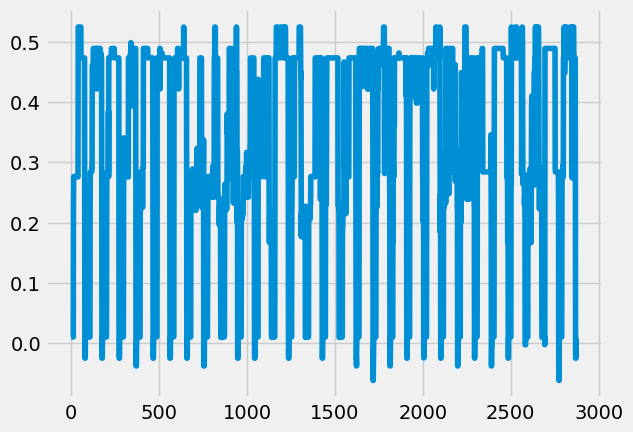

In [101]:
plt.plot(prediction_to_submit)